In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Times']})
# rc('text', usetex=True)

colors = {
    "p53": "#008DD5",
    "nutlin": "#DB5461",
    "nfkb": "#C33149",
    "tnf": "#107E7D",
    "gray": "#DAE0DC",
    "Mf": "#00A878",
    "mdm2_rna": "#FFA552"
}

In [3]:
### OBS ÆNDREDE KONSTANTER!!! IKKE DE RIGTIGE!!!

vi = 0.01
Vol = vi*10**(-14); NA = 6.02*10**(23); Cal = NA*Vol*10**(-6)
TC = 0.158
kc1 = 0.66
# production of p53 [molecules/min]
kc2 = 0.27
# degradation of p53 by mdm2 [1/min]
kc3 = 1.35
# degradation of p53 by mdm2 [molecules]
kc4 = 0.01
# production of mdm2 - mRNA [1/(molecules*min)]
kc5 = 0.11 
# degradation of mdm2 - mRNA [1/min]
kc6 = 0.64 
# production of mdm2 [1/min]
kc7 = 0.28
# degradation of mdm2 [1/min]
kc8 = 0.0036 
# binding of mdm2 and nutlin [1/(molecules*min)]

In [4]:
def p_change(t, p, m, Mf):
    dpdt = kc1 - kc2*Mf*(p / (kc3 + p))
    return dpdt

def m_change(t, p, m, Mf):
    dmdt = (kc4 * p**2 - kc5 * m)
    return dmdt

def M_free_change(t, p, m, Mf):
    dM_freedt = kc6 * m - kc7 * Mf
    return dM_freedt

def samlet_system(t, y):
    dydt = np.zeros_like(y)
    dydt[0] = p_change(t, *y)
    dydt[1] = m_change(t, *y)
    dydt[2] = M_free_change(t, *y)
    return dydt

In [14]:
t_samlet = (0, 2000)

p0, m0, Mf0 = 0.76, 1.30, 0.63

y0 = [p0, m0, Mf0]

In [15]:
sim = solve_ivp(samlet_system, t_samlet, y0, method='LSODA', max_step=0.1, dense_output=True)

In [16]:
t = sim["t"]
p = sim["y"][0]
m = sim["y"][1]
M = sim["y"][2]

Text(0.0, -0.18, "['p0: 0.76', 'm0: 1.3', 'M0: 0.63', 'k1: 0.66', 'k2: 0.27', 'k3: 1.35', 'k4: 0.01', 'k5: 0.11', 'k6: 0.64', 'k7: 0.28']")

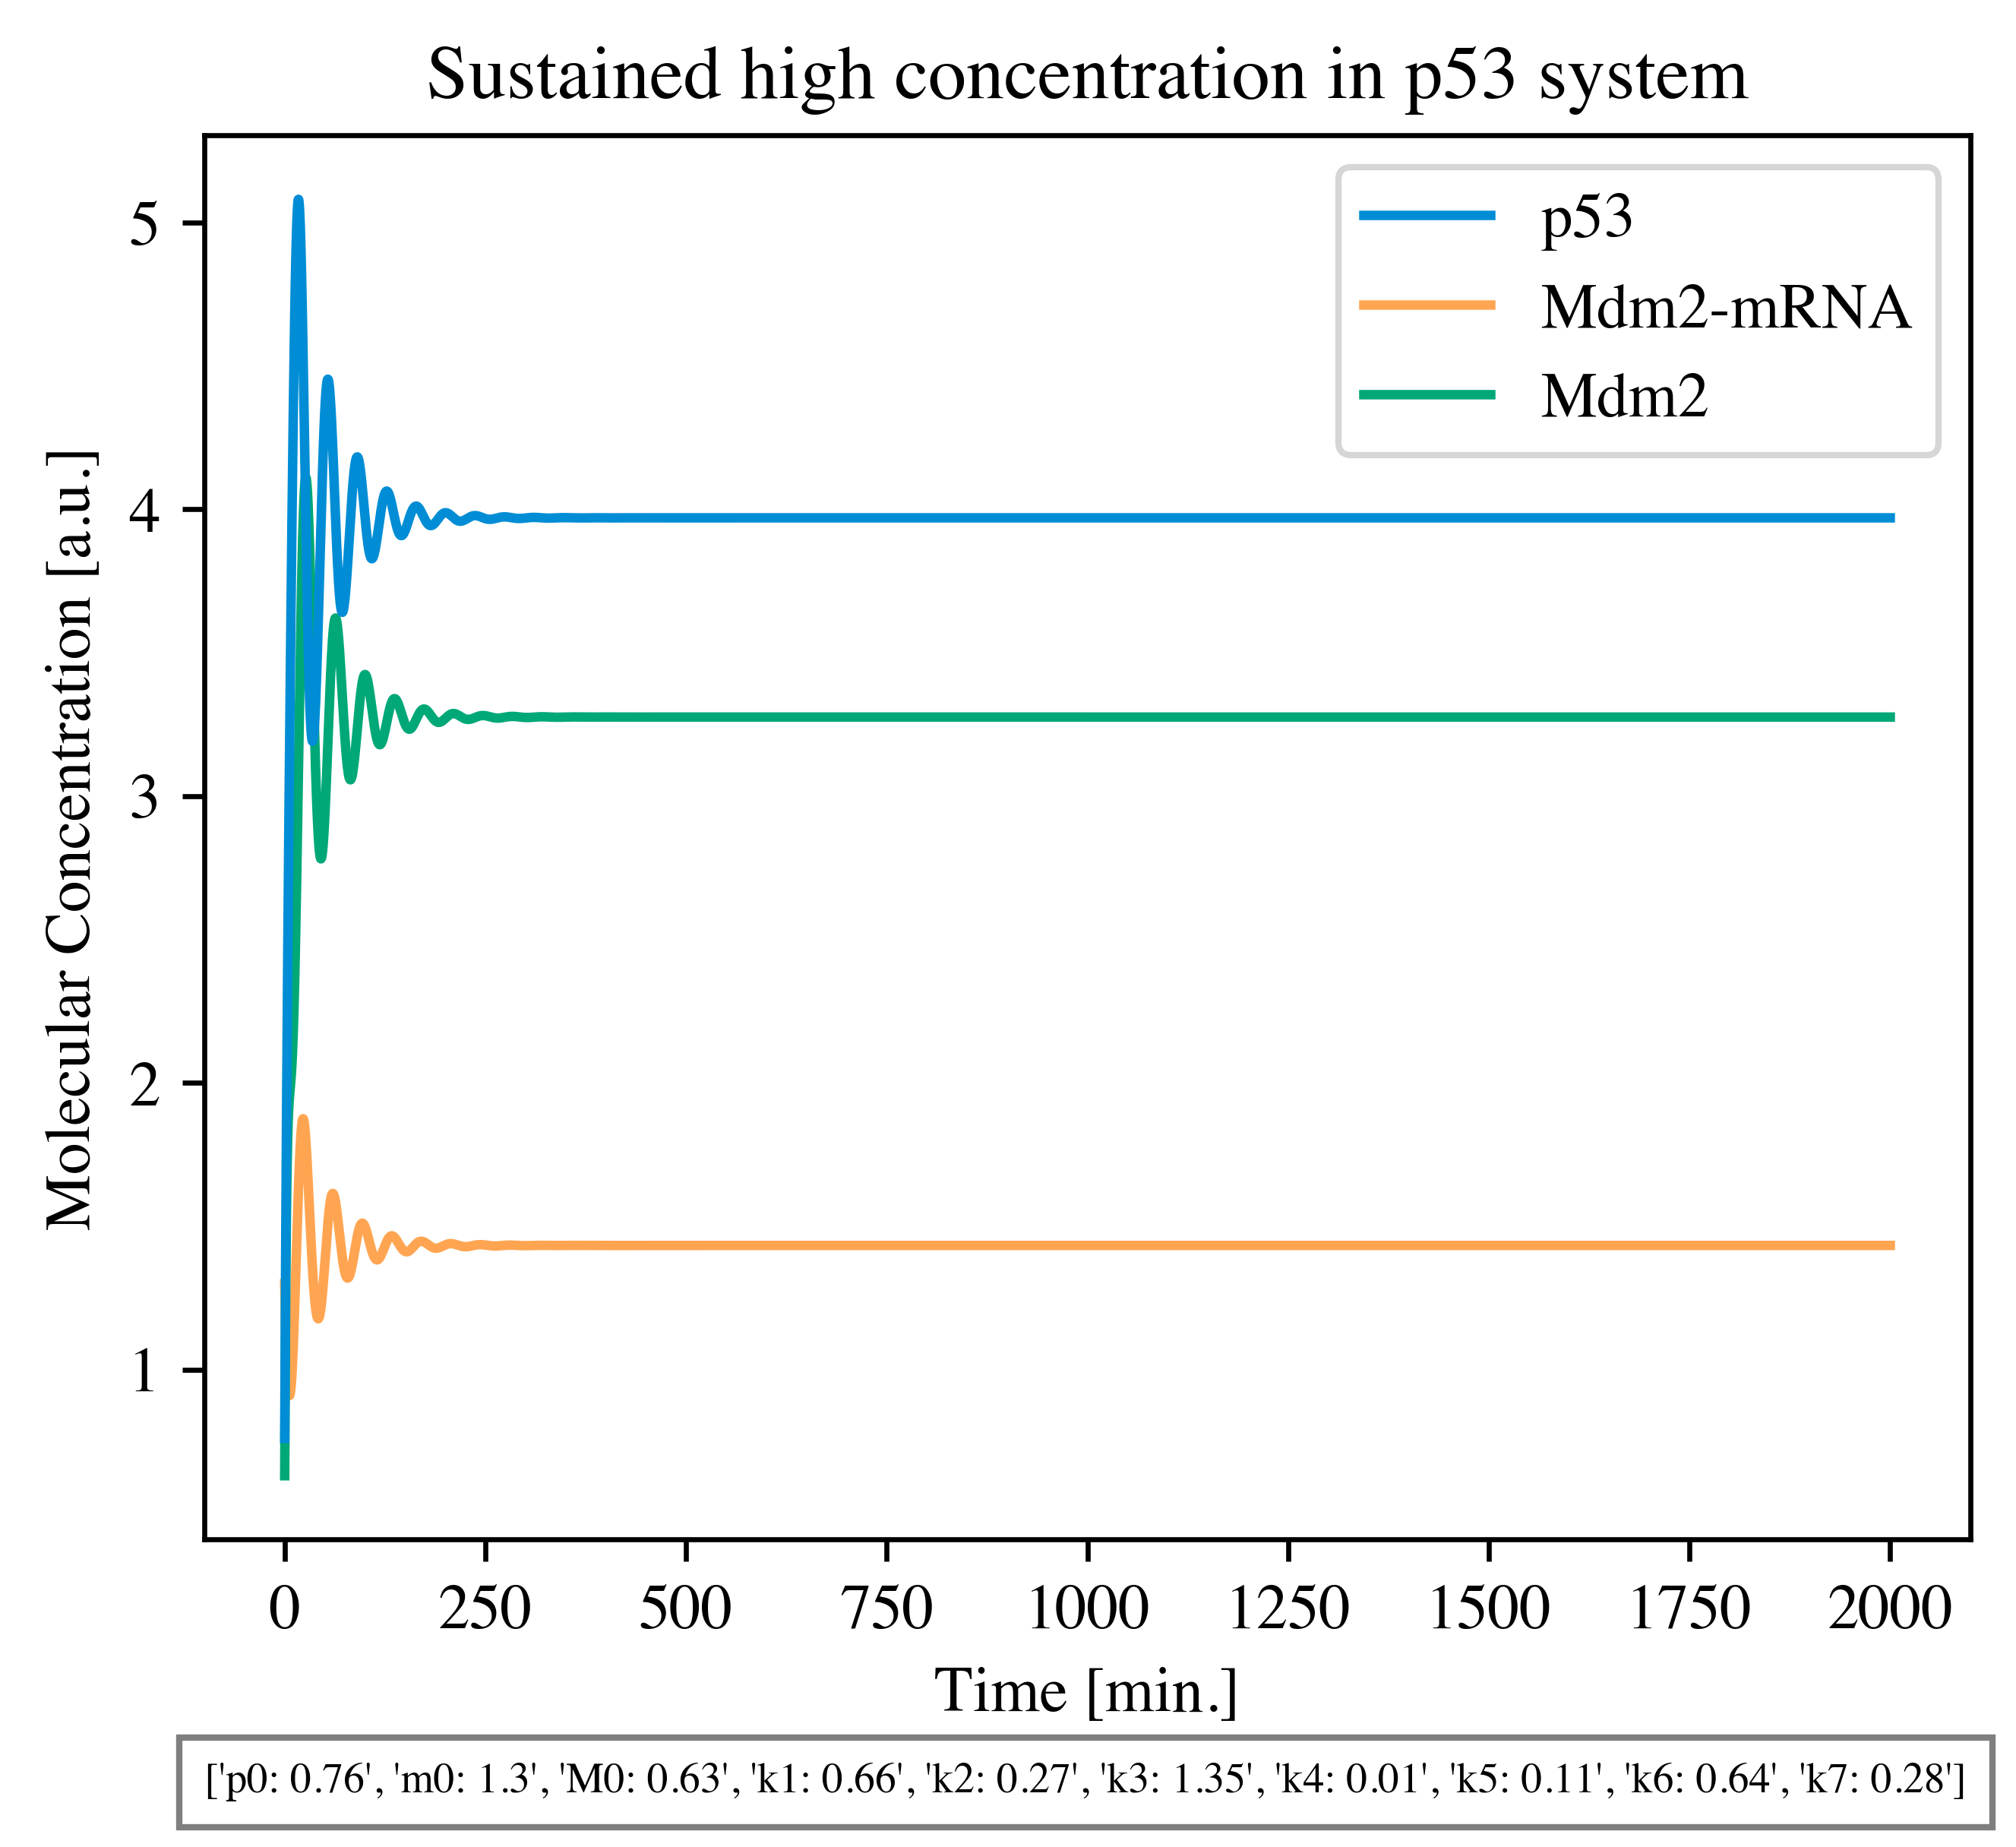

In [22]:
plt.figure(figsize=(5,4), dpi=600)
plt.plot(t, p, color=colors["p53"], zorder=5, label="p53")
plt.plot(t, m, color=colors["mdm2_rna"], label="Mdm2-mRNA")
plt.plot(t, M, color=colors["Mf"], label="Mdm2")
plt.title("Sustained high concentration in p53 system")
plt.xlabel("Time [min.]")
plt.ylabel("Molecular Concentration [a.u.]")
plt.legend()

constants = {
    rf'p0': 0.76,
    rf'm0': 1.30,
    rf'M0': 0.63,
    rf'k1': 0.66,
    rf'k2': 0.27,
    rf'k3': 1.35,
    rf'k4': 0.01,
    rf'k5': 0.11,
    rf'k6': 0.64,
    rf'k7': 0.28,
}

# Add a box with constant values
plt.text(0.0, -0.18, ([f"{key}: {value}" for key, value in constants.items()]),
        #  horizontalalignment='left',
        #  verticalalignment='center',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5), size=6.7)